#Credit Card Fraud Detection 

**Step 1: Import the required packages**

In this project, primary packages are going to be Pandas to work with data, NumPy to work with arrays, scikit-learn for data split, building and evaluating the classification models, and finally the xgboost package for the xgboost classifier model algorithm.

In [2]:
import pandas as pd #data processing
import numpy as np #working with arrays
import matplotlib.pyplot as plt #data visualization
from termcolor import colored as cl #text customization
import itertools #advanced tools

from sklearn.preprocessing import StandardScaler #data normalization
from sklearn.model_selection import train_test_split #data split
from sklearn.tree import DecisionTreeClassifier #decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.linear_model import LogisticRegression #logistic regression algorithm
from sklearn.svm import SVC #SVM algorithm
from sklearn.ensemble import RandomForestClassifier #random forest tree algorithm
from xgboost import XGBClassifier #XGBoost algorithm

from sklearn.metrics import confusion_matrix #evaluation metric
from sklearn.metrics import accuracy_score #evaluation metric
from sklearn.metrics import f1_score #evaluation metric

**Step 2: Import the data**

The data we are going to use is the Kaggle Credit Card Fraud Detection dataset.

It contains features V1 to V28 which are the principal components obtained by PCA. We are going to neglect the time feature which is of no use to build the models. The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not.


In [3]:
df = pd.read_csv("/content/creditcard.csv")
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


**Step 3: Data Processing and EDA**

To find look at how many fraud cases and non-fraud cases are there in this dataset. 

Along with that, also compute the percentage of fraud cases in the overall recorded transactions.

In [4]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('------------------------------------', attrs = ['bold']))
print(cl('Total no. of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
------------------------------------
Total no. of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


We can see that out of 284,807 samples there are only 492 fraud cases which is only 0.17 percent of the total samples. So, we can say that the data we are dealing with is highly imbalanced data and needs to be carefully handled when modelling and evaluation.



Getting a statistical view of both fraud and non fraud transaction amounts data using 'describe' method in python

In [5]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In the statistics, it is seeen that the values in the 'Amount' variable are varying enormously when compared to the rest of the variables.

To reduce its wide range of values we can normalise it using 'Standard Scaler' method in python



In [6]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


**Step 4: Feature Selection and Data Split**

In this process, we are going to define the independent (X) and the dependent (Y) variables. Uisng the defined variables we will split the data into a training set and a testing set which is further used in modelling and evaluation. We can split the data easily using 'train_test_split' algorithm in python.

In [8]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Step 5: Modelling - Build 6 types of Classification Models**

In this step, we will be building six different types of classification models namely:
1. Decision Tree
2. K-Nearest Neighbors (KNN) 
3. Logistic Regression 
4. Support Vector Machine (SVM) 
5. Random Forest
6. XGBoost

Even though there are many more models which we can use, these are the most popular models used for solving classification problems. 

All these models can be built feasibly using the algorithms provided by the scikit-learn package. Only for the XGBoost model, we are going to use the xgboost package.


In [11]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth=4, criterion= 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)



In the above code, we have built six different types of classification models starting from the Decision tree model to the XGBoost model.

1. Starting with the decision tree, we have used the ‘DecisionTreeClassifier’ algorithm to build the model. Inside the algorithm, we have mentioned the ‘max_depth’ to be ‘4’ which means we are allowing the tree to split four times and the ‘criterion’ to be ‘entropy’ which is most similar to the ‘max_depth’ but determines when to stop splitting the tree. Finally, we have fitted and stored the predicted values into the ‘tree_yhat’ variable.

2. Next is the K-Nearest Neighbors (KNN). We have built the model using the ‘KNeighborsClassifier’ algorithm and mentioned the ‘n_neighbors’ to be ‘5’. The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values, followed by fitting and storing the predicted values into the ‘knn_yhat’ variable.

3. The Code for Logistic regression is kept in a way more simplistic manner by using the ‘LogisticRegression’ algorithm and as usual, fitted and stored the predicted variables in the ‘lr_yhat’ variable.

4. We built the Support Vector Machine model using the ‘SVC’ algorithm and we didn’t mention anything inside the algorithm as we managed to use the default kernel which is the ‘rbf’ kernel. After that, we stored the predicted values into the ‘svm_yhat’ after fitting the model.

5. The next model is the Random forest model which we built using the ‘RandomForestClassifier’ algorithm and we mentioned the ‘max_depth’ to be 4 just like how we did to build the decision tree model. Finally, fitting and storing the values into the ‘rf_yhat’. 

6. Our final model is the XGBoost model. We built the model using the ‘XGBClassifier’ algorithm provided by the xgboost package. We mentioned the ‘max_depth’ to be 4 and finally, fitted and stored the predicted values into the ‘xgb_yhat’.

**Step 6: Evaluation**

In this process we are going to evaluate our built models using the evaluation metrics provided by the scikit-learn package. Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.



**1. Accuracy Score**

Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage). It can generally be expressed as:

**Accuracy score = No.of correct predictions / Total no.of predictions**



In [12]:
#1. Accuracy Score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994733330992591
------------------------------------------------------------------------


According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Logistic regression model to be the least accurate model. However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

**2. F1 Score**

The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2. It can be expressed as:

**F1 score = 2( (precision * recall) / (precision + recall) )**

The F1 score can be calculated easily in python using the ‘f1_score’ method provided by the scikit-learn package.

In [13]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8421052631578948
------------------------------------------------------------------------


The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the KNN model snatches the first place again and the Logistic regression model remains to be the least accurate model.

**3. Confusion Matrix**

Typically, a confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding.

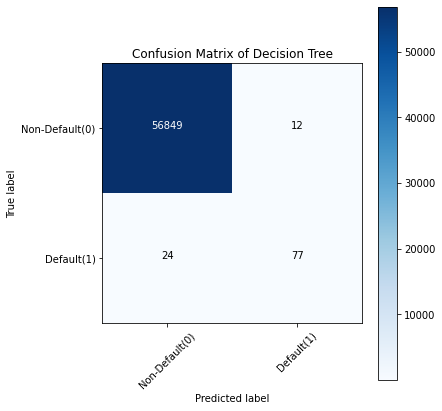

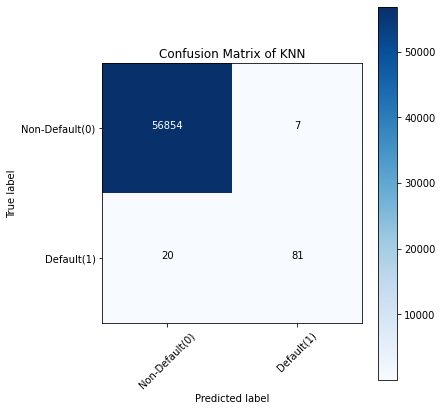

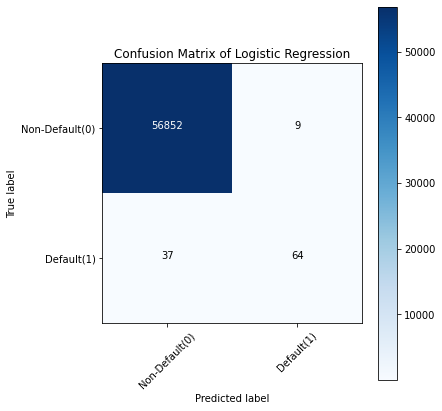

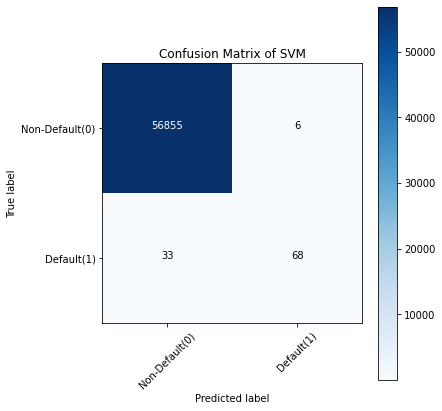

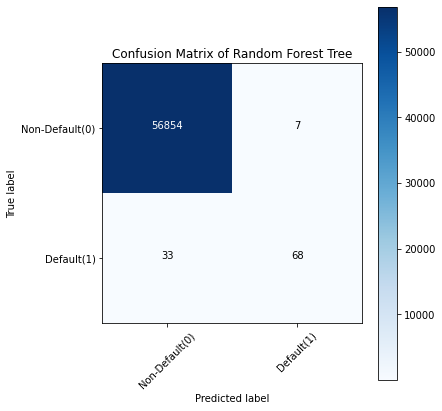

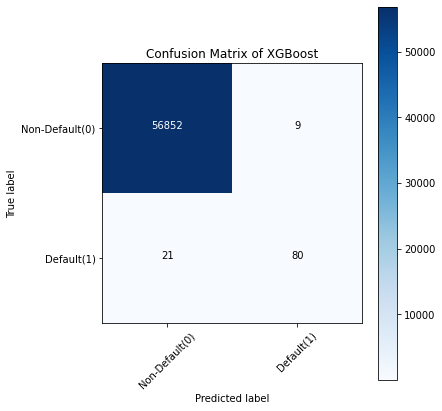

In [14]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

Let’s take the confusion matrix of the XGBoost model as an example. Look at the first row. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56854 of them as 0 and 7 of them as 1. It means, for 56854 non-fraud transactions, the actual churn value was 0in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.

Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 79 of them as 1, and 22 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model.

Like this, while comparing the confusion matrix of all the models, it can be seen that the K-Nearest Neighbors model has performed a very good job of classifying the fraud transactions from the non-fraud transactions followed by the XGBoost model. So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Logistic regression model.